# Import Libaraies 

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import re
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing Data 

In [392]:
df_train = pd.read_csv('C:/Users/user/Anaconda3/train.csv')
df_test = pd.read_csv('C:/Users/User/Anaconda3/test.csv')

# Data Exploration 

In [393]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [394]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [395]:
df_train.shape

(891, 12)

In [396]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [397]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [398]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [399]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Data Visualization 

In [400]:
df_train['Died'] = 1 - df_train['Survived']

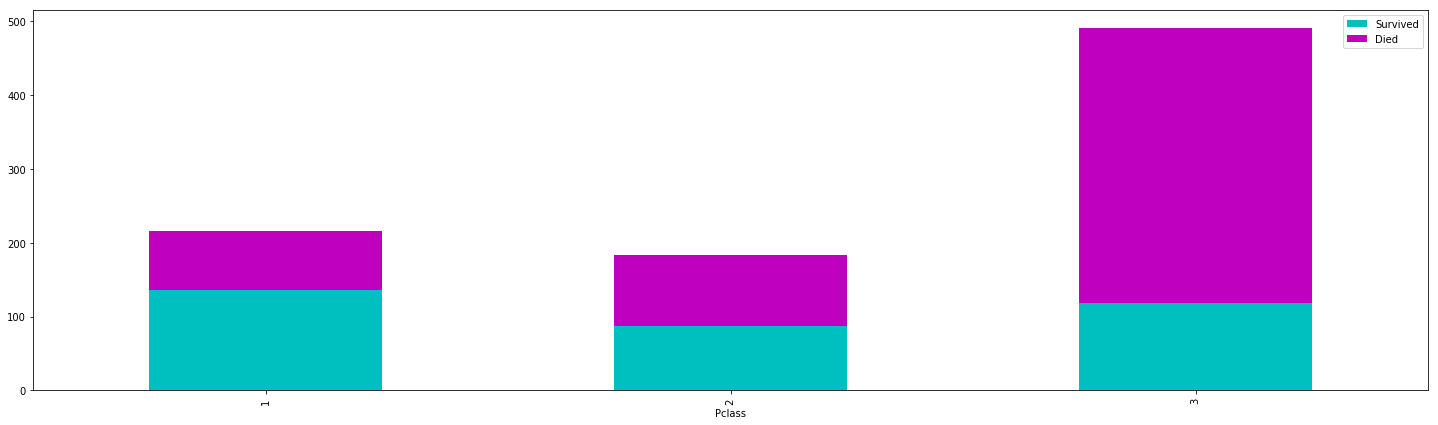

In [401]:
df_train.groupby('Pclass').agg('sum')[['Survived','Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['c', 'm']);
plt.show()

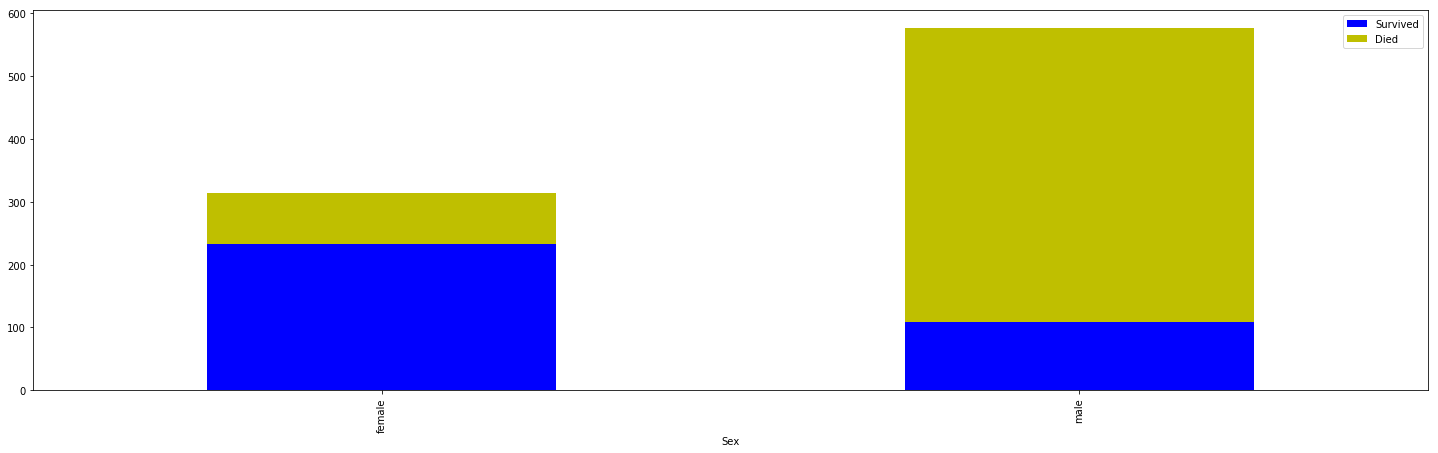

In [402]:
df_train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['b', 'y']);
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


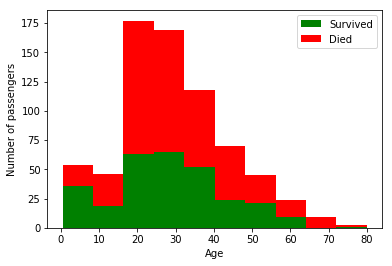

In [403]:
plt.hist([df_train[df_train['Survived'] == 1]['Age'],df_train[df_train['Survived']== 0]['Age']], bins = 10, stacked = True, color = ['g','r'], label = ['Survived','Died'] )
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

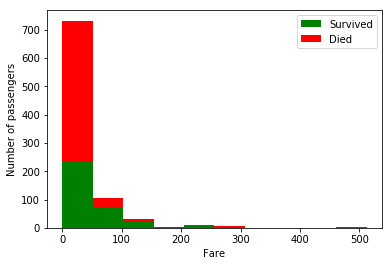

In [404]:
plt.hist([df_train[df_train['Survived'] == 1]['Fare'],df_train[df_train['Survived']== 0]['Fare']], bins = 10, stacked = True, color = ['g','r'], label = ['Survived','Died'] )
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

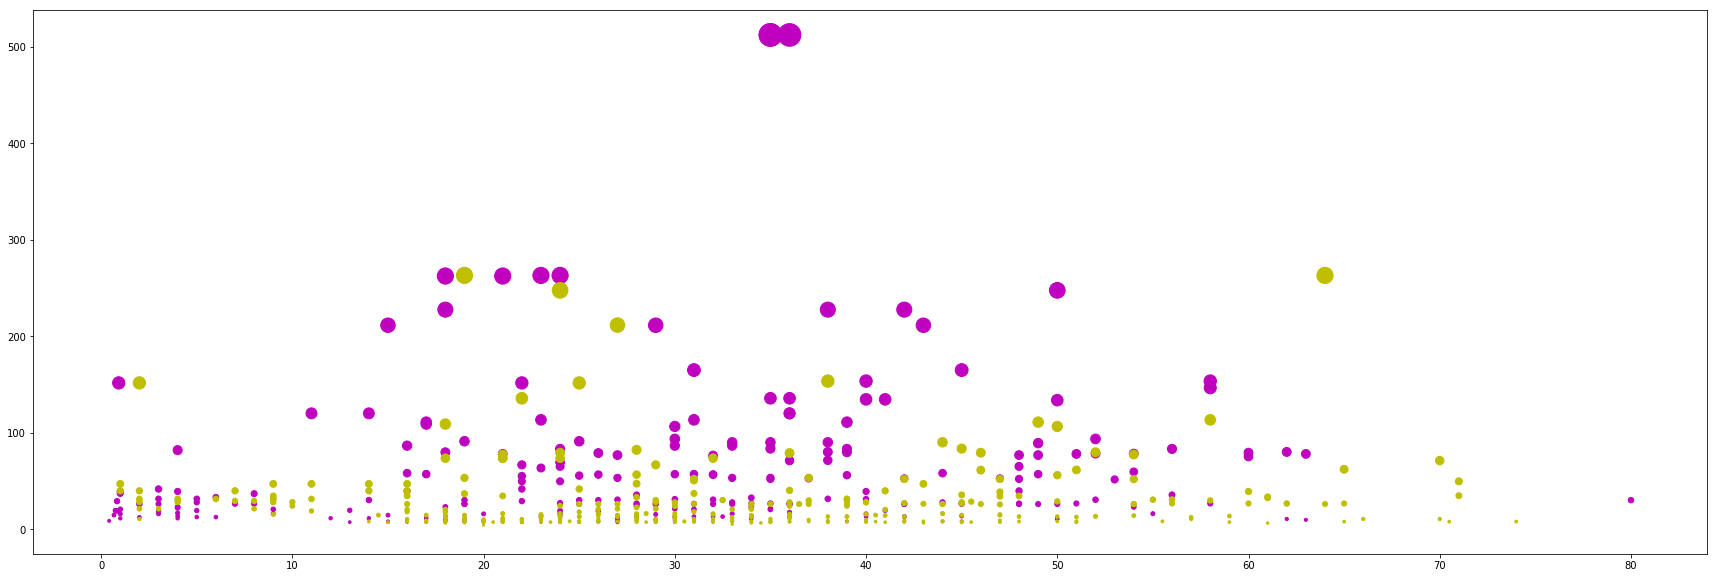

In [405]:
plt.figure(figsize = (30,10))
ax = plt.subplot()
ax.scatter(df_train[df_train['Survived'] == 1]['Age'], df_train[df_train['Survived'] == 1]['Fare'], c = 'm', s = df_train[df_train['Survived'] == 1]['Fare'])
ax.scatter(df_train[df_train['Survived'] == 0]['Age'], df_train[df_train['Survived'] == 0]['Fare'], c = 'y', s = df_train[df_train['Survived'] == 0]['Fare'])
plt.show()

In [406]:
# adults with largest ticket fare survived (magenta) and adults with low ticket fare died(yellow). 
#childern between 0-10 with magenta dots survived.  

# Combining the train and test data 

In [407]:
label = df_train['Survived']
df_train = df_train.drop(['Survived','Died'], axis = 1)
df = df_train.append(df_test)
df.reset_index(inplace=True)
df = df.drop(['index','PassengerId'], axis = 1)


In [408]:
df.shape

(1309, 10)

# Data Cleaning 

In [409]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # using median bcz more robust with outliers 

In [410]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [411]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Processing the column 'Cabin'. 
# Step 1. Replacing all the NaN with N 
# Step 2. Replacing other Cabin Numbers with their first letter.
# Step 3. Counting all the unique values and numbering them from 0 to the total number of unique values and replacing the Cabin column with those numbers. 

In [412]:
# Step 1
df['Cabin'].fillna('N',inplace = True)

In [414]:
# Step 2
for x,y in zip(df['Cabin'],range(df.shape[0])):
    df.loc[y,'Cabin'] = str(x)[0]

In [415]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [416]:
# Step 3
cabin_list = list(df['Cabin'].unique())
for x,y in zip(df['Cabin'],range(df.shape[0])):
               df.loc[y,'Cabin'] = cabin_list.index(x)
    

In [417]:
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,0,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,2,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [ ]:
# Processing the column 'Embarked'. 
# Step 1. Replacing all the NaN with S which is the highest count in this column.  
# Step 2. Counting all the unique values and numbering them from 0 to the total number of unique values and replacing the Cabin column with those` numbers. 

In [418]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [419]:
# Step 1
df['Embarked'].fillna('S',inplace = True)

In [420]:
# Step 2
embarked_list = list(df['Embarked'].unique())
for x,y in zip(df['Embarked'],range(df.shape[0])):
               df.loc[y,'Embarked'] = embarked_list.index(x)

In [421]:
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0
5,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,0,2
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,2,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,1


In [ ]:
# Processing the column Sex
# Step 1. Replacing 'male' as 0
# Step 2. Replacing 'female' as 1

In [422]:
# Step 1
df['Sex'].replace('male',0,inplace = True)

In [423]:
# Step 2
df['Sex'].replace('female',1,inplace = True)

In [424]:
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
5,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,2
6,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,2,0
7,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,1


In [425]:
for name,y in zip(df['Name'],range(df.shape[0])):
    df.loc[y,'Name'] = name.split(',')[1].split('.')[0]

In [426]:
name_list = list(df['Name'].unique())
for x,y in zip(df['Name'],range(df.shape[0])):
    df.loc[y,'Name'] = name_list.index(x)

In [427]:
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0,22.0,1,0,A/5 21171,7.2500,0,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,1
2,3,2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,1,1,1,35.0,1,0,113803,53.1000,1,0
4,3,0,0,35.0,0,0,373450,8.0500,0,0
5,3,0,0,28.0,0,0,330877,8.4583,0,2
6,1,0,0,54.0,0,0,17463,51.8625,2,0
7,3,3,0,2.0,3,1,349909,21.0750,0,0
8,3,1,1,27.0,0,2,347742,11.1333,0,0
9,2,1,1,14.0,1,0,237736,30.0708,0,1


In [428]:
for x,y in zip(df['Ticket'],range(df.shape[0])):
    x = x.replace('/','')
    x = x.replace('.','')
    p = re.findall('[a-zA-Z0-9]',x)
    for i in range(1):
        if p[i].isdigit():
            df.loc[y,'Ticket'] = 'x'
            continue
        else:
            df.loc[y,'Ticket'] = p[0] + p[1]    

In [429]:
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0,22.0,1,0,A5,7.2500,0,0
1,1,1,1,38.0,1,0,PC,71.2833,1,1
2,3,2,1,26.0,0,0,ST,7.9250,0,0
3,1,1,1,35.0,1,0,x,53.1000,1,0
4,3,0,0,35.0,0,0,x,8.0500,0,0
5,3,0,0,28.0,0,0,x,8.4583,0,2
6,1,0,0,54.0,0,0,x,51.8625,2,0
7,3,3,0,2.0,3,1,x,21.0750,0,0
8,3,1,1,27.0,0,2,x,11.1333,0,0
9,2,1,1,14.0,1,0,x,30.0708,0,1


In [430]:
Ticket_list = list(df['Ticket'].unique())
for x,y in zip(df['Ticket'],range(df.shape[0])):
    df.loc[y,'Ticket'] = Ticket_list.index(x)

In [431]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0,22.0,1,0,0,7.2500,0,0
1,1,1,1,38.0,1,0,1,71.2833,1,1
2,3,2,1,26.0,0,0,2,7.9250,0,0
3,1,1,1,35.0,1,0,3,53.1000,1,0
4,3,0,0,35.0,0,0,3,8.0500,0,0


In [432]:
x = np.array(df[:891].astype(float))
x = preprocessing.scale(x)
y = np.array(label)
x_train,x_test,y_train,y_test = model_selection.train_test_split(x, y, test_size = 0.2,random_state=7)

In [433]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean())

0.799197965571205


In [434]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [435]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.799198 (0.041415)
LDA: 0.809018 (0.047267)
QDA: 0.778130 (0.042849)
KNN: 0.827465 (0.054266)
CART: 0.790708 (0.037426)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

RF: 0.825939 (0.057743)
NB: 0.771009 (0.038580)
SVM: 0.837167 (0.055220)


# Hyperparameters Tuning

In [437]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depths = np.linspace(1, 32, 32, endpoint=True)
result = []
#for estimator in n_estimators :
 #   RF = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
  #  RF.fit(x_train, y_train)
   # predictions = RF.predict(x_test)
    #pred_result = accuracy_score(y_test, predictions)
  
#print('\n')
#for max_depth in max_depths :
 #   RF = RandomForestClassifier(n_estimators = 16, n_jobs = -1, max_depth = max_depth)
  #  RF.fit(x_train, y_train)
   # predictions = RF.predict(x_test)
    #pred_result = accuracy_score(y_test, predictions)
    
RF = RandomForestClassifier(bootstrap = True, n_estimators = 32, n_jobs = -1, max_depth = 16,  min_samples_split = 4, min_samples_leaf = 1)
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
pred_result = accuracy_score(y_test, predictions)
print(pred_result)

RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
print(RF, ':', accuracy_score(y_test, predictions))
new_pred = RF.predict(np.array(df[891:].astype(float)))
new_pred_df = pd.DataFrame(new_pred, columns = ['Survived'])
new_pred_df['PassengerId'] = df_test['PassengerId']
new_pred_df = new_pred_df[['PassengerId','Survived']]
new_pred_df.to_csv('submission3.csv',index = False)

0.8100558659217877
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) : 0.7988826815642458
